In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from skimage.io import imread
from skimage.transform import resize

from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# importing the data 

In [20]:
yes_t_labels = [ 1 for file in os.listdir("data/Train/yes")]
no_t_labels = [ 0 for file in os.listdir("data/Train/no") ]
yes_test_labels = [ 1 for file in os.listdir("data/Validation/yes")]
no_test_labels = [ 0 for file in os.listdir("data/Validation/no")]
y_train = yes_t_labels + no_t_labels
y_test = yes_test_labels + no_test_labels

In [3]:
def ImageLoader(file, root):
    filename = "{}".format(file)
    file_path = os.path.join(root, filename)
    img = imread(file_path, as_gray=True)
    img = resize(img, (100,100), anti_aliasing=True, mode='reflect')
    return img    

# Trying to import an image

# Import the images into 2 sets Train and Test images

In [4]:
train = [ImageLoader(file, "data/Train/Yes") for file in os.listdir("data/Train/Yes") ] + [ImageLoader(file, "data/Train/No") for file in os.listdir("data/Train/No")]

In [21]:
test = [ImageLoader(file, "data/Validation/Yes") for file in os.listdir("data/Validation/Yes") ] + [ImageLoader(file, "data/Validation/No") for file in os.listdir("data/Validation/No")]

# Preprocessing

# Creating and scaling matrix features

In [10]:
def create_features(img):
    color_feature = img.flatten()
    gray_image = rgb2gray(img)
    hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    flat_features = np.hstack(color_feature)
    return flat_features

def create_feature_matrix(imgs):
    feature_list = []
    
    for img in imgs:
        image_features = create_features(img)
        feature_list.append(image_features)
        
    feature_matrix = np.array(feature_list)
    return feature_matrix
        
def scaling(matrix):
    ss = StandardScaler()
    stand = ss.fit_transform(matrix)

    pca = PCA(n_components=500)
    mat_pca = ss.fit_transform(stand)
    return mat_pca

In [7]:
X_train = create_feature_matrix(train)

<ipython-input-6-0f95d231e532>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = rgb2gray(img)


In [22]:
X_test = create_feature_matrix(test)

<ipython-input-10-aca724f10b50>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = rgb2gray(img)


# Scaling feature matrix

In [11]:
X_train = scaling(X_train)

In [12]:
X_test = scaling(X_test)

# Train model

In [14]:
from sklearn.svm import SVC

In [35]:
svm = SVC(kernel='linear', probability=True, random_state=50)
svm.fit(X_train,y_train)

SVC(kernel='linear', probability=True, random_state=50)

# Score model

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [36]:
# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.36425339366515835


# ROC curve + AUC

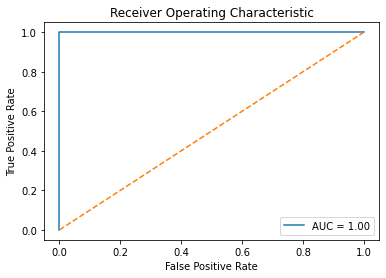

In [25]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

#  KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

# Score model

In [33]:
y_pred = knn.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.36425339366515835
